### Predicting Red wine quality with different classification techniques:

### Objectives
The objectives of this project are as follows

- To experiment with different classification methods and to see which yields the highest accuracy
- To determine which features are the most indicative of a good quality wine


### Download winequality-red dataset from UCI repository

#### The quality of a wine is determined by 11 input variables:

Fixed acidity <br>
Volatile acidity <br>
Citric acid <br>
Residual sugar <br>
Chlorides <br>
Free sulfur dioxide <br>
Total sulfur dioxide <br>
Density <br>
pH <br>
Sulfates <br>
Alcohol <br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#copy url from UCI repository and paste and add required dataset to the end
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep = ";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Missing Values
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [4]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

### Exploring Variables

<AxesSubplot:ylabel='Frequency'>

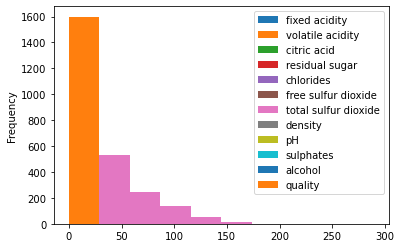

In [5]:
df.plot.hist()

array([[<AxesSubplot:title={'center':'quality'}>]], dtype=object)

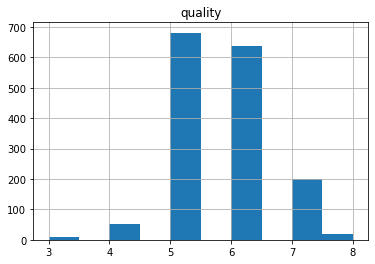

In [6]:
df.hist(column='quality')

### Correlation Matrix

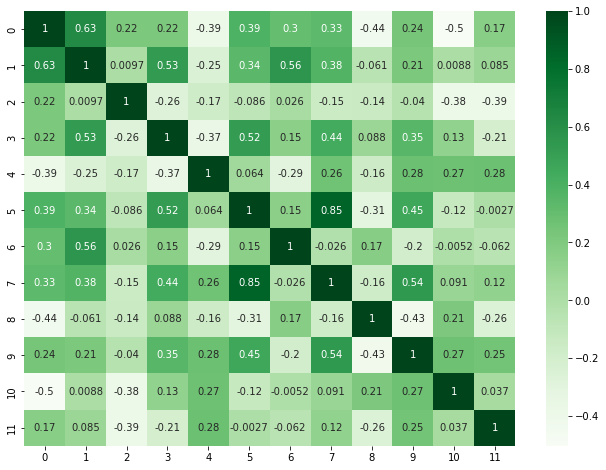

In [7]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(18, 18))
df= df.iloc[: , :12].copy()
corr = df.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

### Convert to a Classification Problem
Going back to our objective, since we wanted to compare the effectiveness of different classification techniques, we need to change the output variable to a binary output.

For this problem, define a bottle of wine as ‘good quality’ if it had a quality score of 7 or higher, and if it had a score of less than 7, it was deemed ‘bad quality’.

Once output variable is converted to a binary output, feature variables (X) and the target variable (y) are separated.

In [10]:
# Create Classification version of target variable
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]


In [11]:
# Separate feature variables and target variable
X = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']

In [12]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [13]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: goodquality, Length: 1599, dtype: int64

In [14]:
df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

### Preparing Data for Modelling

#### Standardizing Feature Variables
Now prepare the data for modelling.
The first thing is to standardize the data. Standardizing the data means it will transform the data to have distribution  mean of 0 and standard deviation of 1. It’s important to standardize data in order to equalize the range of the data.

In [15]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

Split data
Next split the data into a training and test to cross-validate  models and determine their effectiveness.



In [16]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

### Modelling

Now comparing five different machine learning models: decision trees, random forests, AdaBoost, Gradient Boost, and XGBoost. For the purpose of this project,we compare these models by their accuracy.

### Model 1: Decision Tree

Decision trees are a popular model, used in operations research, strategic planning, and machine learning. Each square above is called a node, and the more nodes you have, the more accurate your decision tree will be (generally). The last nodes of the decision tree, where a decision is made, are called the leaves of the tree.

In [17]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       290
           1       0.48      0.77      0.59        30

    accuracy                           0.90       320
   macro avg       0.73      0.84      0.77       320
weighted avg       0.93      0.90      0.91       320



### Model 2: Random Forest

Random forests are an ensemble learning technique that builds off of decision trees.<br> Random forests involve creating multiple decision trees using bootstrapped datasets of the original data and randomly selecting a subset of variables at each step of the decision tree. <br> The model then selects the mode of all of the predictions of each decision tree. <br> What’s the point of this? By relying on a “majority wins” model, it reduces the risk of error from an individual tree.

In [18]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       290
           1       0.67      0.60      0.63        30

    accuracy                           0.93       320
   macro avg       0.81      0.78      0.80       320
weighted avg       0.93      0.93      0.93       320



### Model 3: AdaBoost

The next three models are boosting algorithms- AdaBoost, Gradient Boosting, and XGBoosting.

In [19]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(random_state=1)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       290
           1       0.52      0.43      0.47        30

    accuracy                           0.91       320
   macro avg       0.73      0.70      0.71       320
weighted avg       0.90      0.91      0.91       320



### Model 4: Gradient Boosting

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(random_state=1)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       290
           1       0.53      0.57      0.55        30

    accuracy                           0.91       320
   macro avg       0.74      0.76      0.75       320
weighted avg       0.92      0.91      0.91       320



### Model 5: XGBoost

In [ ]:
from xgboost import XGBClassifier
model5 = XGBClassifier(random_state=0)
model5.fit(X_train, y_train)


In [22]:
y_pred5 = model5.predict(X_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       290
           1       0.52      0.77      0.62        30

    accuracy                           0.91       320
   macro avg       0.75      0.85      0.79       320
weighted avg       0.93      0.91      0.92       320



By comparing the five models, the random forest and XGBoost seems to yield the highest level of accuracy. However, since XGBoost has a better f1-score for predicting good quality wines (1), Thus concluding that the XGBoost is the winner of the five models.

#### Feature Importance
Below is the graph of  the feature importance based on the Random Forest model and the XGBoost model. <br>While they slightly vary, the top 3 features are the same: alcohol, volatile acidity, and sulphates.

### via Random Forest

<AxesSubplot:>

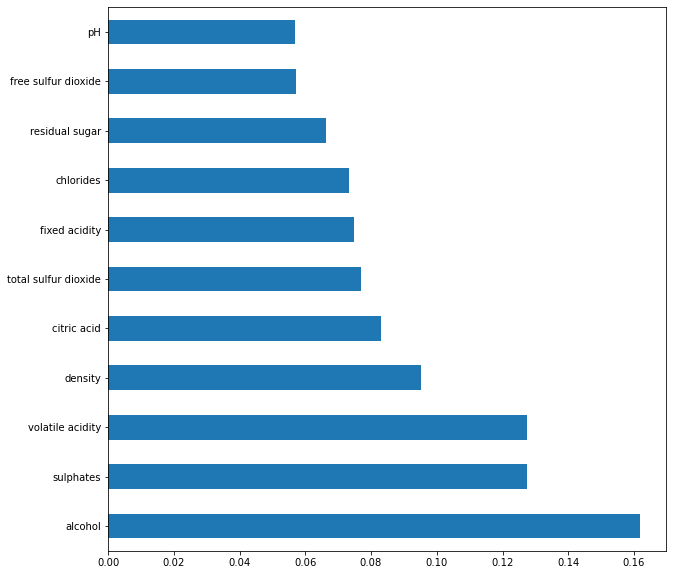

In [26]:
feat_imp = pd.Series(model2.feature_importances_, index=X_features.columns)
feat_imp.nlargest(25).plot(kind='barh',figsize=(10,10))

### via XGBoost

<AxesSubplot:>

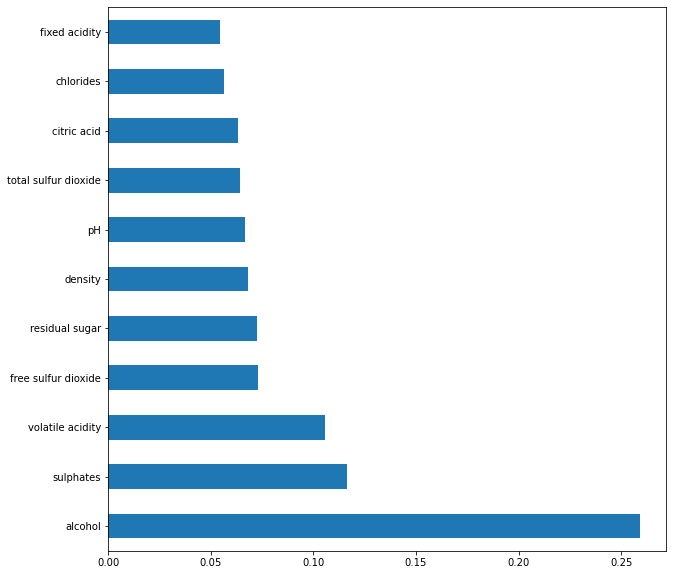

In [27]:
feat_imp = pd.Series(model5.feature_importances_, index=X_features.columns)
feat_imp.nlargest(25).plot(kind='barh',figsize=(10,10))


### Comparing the Top 4 Features

In [28]:
# Filtering df for only good quality
df_good_quality = df[df['goodquality']==1]
df_good_quality.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.0
mean,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949,1.0
std,1.999977,0.144963,0.194438,1.363026,0.028480,10.234615,32.572238,0.002201,0.154478,0.134038,0.998153,0.276443,0.0
min,4.900000,0.120000,0.000000,1.200000,0.012000,3.000000,7.000000,0.990640,2.880000,0.390000,9.200000,7.000000,1.0
25%,7.400000,0.300000,0.300000,2.000000,0.062000,6.000000,17.000000,0.994700,3.200000,0.650000,10.800000,7.000000,1.0
50%,8.700000,0.370000,0.400000,2.300000,0.073000,11.000000,27.000000,0.995720,3.270000,0.740000,11.600000,7.000000,1.0
75%,10.100000,0.490000,0.490000,2.700000,0.085000,18.000000,43.000000,0.997350,3.380000,0.820000,12.200000,7.000000,1.0
max,15.600000,0.915000,0.760000,8.900000,0.358000,54.000000,289.000000,1.003200,3.780000,1.360000,14.000000,8.000000,1.0


In [29]:
# Filtering df for only bad quality
df_bad_quality = df[df['goodquality']==0]
df_bad_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.0
mean,8.236831,0.547022,0.254407,2.512120,0.089281,16.172214,48.285818,0.996859,3.314616,0.644754,10.251037,5.408828,0.0
std,1.682726,0.176337,0.189665,1.415778,0.049113,10.467685,32.585604,0.001808,0.154135,0.170629,0.969664,0.601719,0.0
min,4.600000,0.160000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.0
25%,7.100000,0.420000,0.082500,1.900000,0.071000,8.000000,23.000000,0.995785,3.210000,0.540000,9.500000,5.000000,0.0
50%,7.800000,0.540000,0.240000,2.200000,0.080000,14.000000,39.500000,0.996800,3.310000,0.600000,10.000000,5.000000,0.0
75%,9.100000,0.650000,0.400000,2.600000,0.091000,22.000000,65.000000,0.997900,3.410000,0.700000,10.900000,6.000000,0.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,165.000000,1.003690,4.010000,2.000000,14.900000,6.000000,0.0


By looking into the details, we can see that good quality wines have higher levels of alcohol on average, have a lower volatile acidity on average, higher levels of sulphates on average, and higher levels of residual sugar on average.